<a href="https://colab.research.google.com/github/All4Nothing/pytorch-DL-project/blob/main/Ch01_Pytorch_for_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. 파이토치를 이용한 딥러닝 소개

### 딥러닝 되짚어보기
전통적인 머신러닝 기반의 접근법에서는 Feature Engineering이 훈련된 모델의 전반적인 성능에 결정적인 역할을 한다. 그렇지만 딥러닝 모델에서는 특징을 공들여 수동으로 만들 필요가 없다. 딥러닝 모델은 특징을 직접 다루지 않고도 대용량의 데이터를 잘 다루면서 전통적인 머신러닝 모델을 능가할 수 있다.  
딥러닝 성능은 반드시 특정 데이터셋 크기에 따라 구분되는 것은 아니다. 그렇지만 데이터셋 크기가 더 커질수록 심층 신경망은 딥러닝이 아닌 모델보다 성능이 우수해진다.

![NN Architectural](https://www.asimovinstitute.org/wp-content/uploads/2019/04/NeuralNetworkZoo20042019-1400x2380.png)

(https://www.asimovinstitute.org/neural-network-zoo/)

## PyTorch 살펴보기

### PyTorch Module

**torch.nn**  
신경망 아키텍처를 구축할 때, 네트워크가 구축되는 기본 특징은 계층 수, 각 계층의 뉴런 수, 그중 학습 가능한 뉴런 등이다.  
pytorch nn 모듈을 사용하면 사용자가 자세한 사항을 직접 지정하는 대신 이러한 특징 중 일부를 고수준에서 정의함으로써 신경 아키텍처를 빠르게 인스턴스화 할 수 있다.

nn 모듈을 사용하지 않고 단일 계층 신경망을 초기화 하는 코드


```
import torch
import math

# 이 단일 계층 신경망의 입력값은 256차원, 출력은 4차원으로 가정한다.
# 따라서 랜덤값으로 채워진 256x4 행렬을 초기화한다.
weights = torch.randn(256, 4) / math.sqrt(256)

# 가중치를 훈련 가능하게, 즉 256x4 행렬의 숫자가 경사 역전파를 통해 조정될 수 있게 만든다.
weights.requires_grad_()

# 4차원 출력을 위한 편향값을 더하고 이 편향값도 훈련 가능하게 설정한다.
bias = torch.zeros(4, requires_grad = True)
```




nn 모듈을 사용하여 단일 계층 신경망 초기화


```
import torch.nn as nn
weights = nn.Linear(256, 4)
```



torch.nn 모듈에는 torch.nn.functional이라는 하위 모듈이 있다. 이 하위 모듈은 torch.nn 모듈 내부의 모든 함수를 포함하며, 이 외 다른 하위 모듈은 모두 클래스다.  
**손실 함수, 활성화 함수**, 함수적 방식으로 신경망을 생성하기 위해 사용될 수 있는 풀링, 합성곱, 선형 함수 같은 **신경망 함수**가 모두 이 모듈에 포함된다.

torch.nn.functional 모듈을 사용한 손실 함수
```
import torch.nn.functional as F

loss_func = F.cross_entropy
loss = loss_func(model(X), y) # model: nn model, X: input, y: target output
```



**torch.optim**
신경망을 훈련시키는 동안, 네트워크의 가중치나 매개변수를 조정하기 위해 오차를 역전파한다. 이 과정을 **최적화(optimization)**라고 한다.  
optim 모듈은 딥러닝 모델을 훈련하는 동안 다양한 유형의 최적화 스케줄을 실행하는 것과 관련된 도구와 기능을 모두 포함한다.


최적화 단계를 직접 작성
```
with torch.no_grad():
# 확률적 경사 하강법을 사용해 매개변수 업데이트를 적용한다.
  for param in model.parameters(): param -= param.grad * lr
  model.zero_grad()
```



torch.optim 모듈을 사용해 훈련 세션 동안 옵티마이저를 정의하면
```
opt = optim.SGD(model.parameters(), lr=lr)
opt.step()
opt.zero_grad()
```
이렇게 쓸 수 있다



**torch.utils.data**  
torch에서 utils.data 모듈을 통해 제공하는 자체 데이터셋과 DatasetLoader 클래스들은 이용하면 직관적인 방법으로 텐서에 대한 이터레이션 및 기타 연산을 수행할 수 있고, 최적화된 텐서 계산으로 높은 성능이 보장되며, 데이터 입출력 오류도 피할 수 있다

torch.utils.data.DataLoader를 다음과 같이 사용하면


```
from torch.utils.data import (TensorDataset, DataLoader)
train_dataset = TensorDataset(x_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size = bs)
```
다음처럼 데이터 배치를 수작업으로 이터레이션 할 필요 없이,
```
for i in range((n-1)//bs + 1):
  x_batch = x_train[start_i:end_i]
  y_batch = y_train[start_i:end_i]
  pred = model(x_batch)
```
다음과 같이 간단한 코드만 작성하면 된다.
```
for x_batch, y_batch in train_loader:
  pred = model(x_batch)


## 텐서 모듈

텐서는 수학 함수를 연산할 수 있고 GPU를 통해 계산 속도를 높일 수 있는 n차원 배열이며, 딥러닝에 필수적인 계산 그래프와 경사를 기록하는데 사용할 수 있다.

파이토치에서 텐서를 인스턴스화 하는 방법
```
points = torch.tensor([1.0, 4.0, 2.0, 1.0, 3.0, 5.0])
```
첫 번째 항목 가져오기
```
float(points[0])
```
텐서 모양 확인
```
points.shape
```
파이토치에서 텐서는 연속된 메모리에 저장된 숫자 데이터의 1차원 배열의 뷰로 구현된다. 이 배열을 storage instance라 한다. 모든 파이토치 텐서는 다음 예제와 같이 텐서의 기본 storage instance를 출력하기 위해 호출할 수 있는 stoarge 속성을 가지고 있다.

In [1]:
import torch
points = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
points.storage()

<ipython-input-1-7a144fe74e5d>:3: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  points.storage()


 1.0
 4.0
 2.0
 1.0
 3.0
 5.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 6]

텐서가 storage instance의 view라고 하면, 텐서는 그 view를 구현하기 위해 다음 정보를 사용한다.
- 크기
- 스토리지
- 오프셋
- 스트라이드(보폭)

In [2]:
points.size()
# 두 숫자를 곱하면 기반 스토리지 인스턴스의 길이가(여기서는 6) 된다

torch.Size([3, 2])

In [3]:
points.storage_offset()

0

오프셋은 storage 배열에서 텐서의 첫 번째 요소의 인덱스를 나타낸다

In [4]:
points[1].storage_offset()

2

In [5]:
points.stride()

(2, 1)

stride는 각 차원에 대해, 텐서의 다음 요소로 접근하기 위해 건너뛰어야 할 요소의 개수를 포함하고 있다.

텐서에서 사용할 데이터 타입을 지정하는 방법은 다음과 같다.

In [6]:
points = torch.tensor([[1.0, 2.0], [3.0, 4.0]], dtype=torch.float32)

데이터 타입 외, 파이토치의 텐서는 데이터를 저장할 장치를 지정해야 한다. 장치는 인스턴스화할 때 지정할 수 있다.

In [7]:
points = torch.tensor([[1.0, 2.0], [3.0, 4.0]], dtype=torch.float32, device='cpu')

또는 원하는 장치에 텐서의 사본을 생성할 수 있다.
```
points_2 = points.to(device='cuda')
```

텐서를 GPU에 저장하면 계산 속도가 빨라진다. 파이토치에서 텐서 API는 텐서가 위치한 CPU와 GPU에 대체로 동일하므로, 똑같은 텐서를 장치 간 이동시키고, 계산을 수행하고 다시 이동시킬 수 있어 상당히 편리하다.

동일한 유형의 장치가 여러 개 있다면, 즉 GPU가 두 개 이상 있다면 다음처럼 장치의 인덱스를 사용해 텐서를 저장할 장치를 정확하게 지정할 수 있다.
```
points_3 = points.to(device='cuda:0')
```

## 파이토치로 신경망 훈련하기

### import modules

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

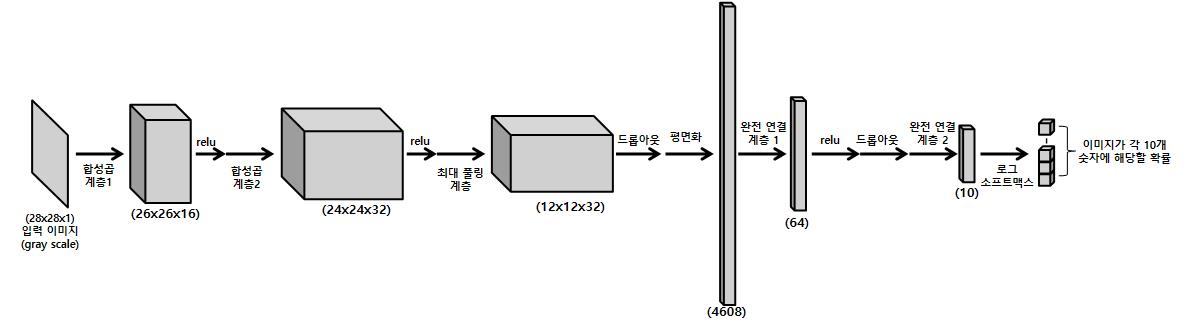

*신경망 아키텍처*

## define model architecture

In [9]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.cn1 = nn.Conv2d(1, 16, 3, 1)
    self.cn2 = nn.Conv2d(16, 32, 3, 1)
    self.dp1 = nn.Dropout2d(0.10)
    self.dp2 = nn.Dropout2d(0.25)
    self.fc1 = nn.Linear(4608, 64)
    self.fc2 = nn.Linear(64, 10)

  def forward(self, x):
    x = self.cn1(x)
    x = F.relu(x)
    x = self.cn2(x)
    x = F.relu(x)
    x = F.max_pool2d(x, 2)
    x = self.dp1(x)
    x = torch.flatten(x, 1)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.dp2(x)
    x = self.fc2(x)
    op = F.log_softmax(x, dim=1)
    return op

`__init__` 함수는 모델의 중추 아키텍처, 즉 각 계층의 뉴런 개수와 함께 모든 계층을 정의한다  
`forward` 함수는 이름에서도 알 수 있듯이 신경망에서 정보를 앞으로 전달한다. 따라서 이 함수는 각 계층에서 쓸 수 있는 모든 활성화 함수와 계층 뒤에 올 풀링이나 드롭아웃 계층을 포함한다. 이 함수는 마지막 계층의 출력, 즉 모델의 예측을 반환한다. 이 출력은 타깃 출력(정답)과 동일한 차원을 갖는다.

첫 번째 합성곱 계층의 입력은 1채널, 출력은 16채널, 커널 크기는 3, 스트라이드는 1이다.  
1채널 입력은 모델에 공급할 흑백 이미지를 위한 것이다.  
일반적으로 커널 크기는 홀수로 정하는데, 입력 이미지 픽셀이 중앙 픽셀을 둘러싸고 대칭으로 분포하기 때문이다.  
이미지의 가장 중요한 시각적 특징은 특정 범위에서 발견하므로, 시각적 패턴을 찾으려면 한번에 인접한 픽셀 몇 개만을 보는 작은 커널을 쓰는 것이 낫다. 그래서 CNN으로 컴퓨터 비전 문제를 풀 때 3x3의 커널 크기를 가장 많이 쓴다.  
이 아키텍처에는 합성곱 계층 두 개가 연속으로 있고, 각 계층은 커널 크기가 3x3이다. 공간 커버리지 관점에서는 커널 크기가 5x5인 합성곱 계층을 하나 사용하는 것과 같다. 그렇지만 작은 커널을 쓰는 계층을 여러 개 사용하면 네트워크가 더 깊어져서 더 복잡한 특징을 학습할 수 있고, 커널 크기가 작아 매개변수가 적기 때문에 즐겨쓰는 방식이다.
합성곱 계층의 출력 채널 수는 일반적으로 입력 채널 수보다 크거나 같다. 첫 번째 합성곱 계층은 1채널 데이터를 취해 16채널을 출력한다. 즉, 이 계층은 입력 이미지로부터 16가지 정보를 탐지한다. 각 채널을 특징 맵(feature map)이라고 하고 각각에는 특징을 추출하는 전용 커널이 있다.  
두 번째 합성곱 계층은 이미지에서 더 많은 종류의 특징을 추출하려고 채널 수를 16에서 32로 늘렸다. CNN에서는 이렇게 채널 수(또는 이미지 깊이)를 늘리는 일이 많다.  
마지막으로 커널 크기가 겨우 3이므로 스트라이드를 1로 설정하는 것은 당연하다. 스트라이드가 커지면 합성곱 연산의 횟수가 적어지는 대신, 커널이 볼 수 있는 영역이 줄어든다.

### define training and inference routines

In [10]:
def train(model, device, train_dataloader, optim, epoch):
    model.train()
    for b_i, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        optim.zero_grad()
        pred_prob = model(X)
        loss = F.nll_loss(pred_prob, y) # nll: 음의 로그 우도 손실
        loss.backward()
        optim.step()
        if b_i % 10 == 0:
            print('epoch: {} [{}/{} ({:.0f}%)]\t training loss: {:.6f}'.format(
                epoch, b_i * len(X), len(train_dataloader.dataset),
                100. * b_i / len(train_dataloader), loss.item()))

이 코드는 데이터셋에서 배치 단위로 반복하고, 주어진 장치에 데이터셋 사본을 만들고, 신경망 모델에서 추출된 데이터를 앞으로 전달하고, 모델의 예측값과 정답 사이의 손실을 계산하고, 주어진 옵티마이저를 사용해 모델 가중치를 조정하고, 배치 10개마다 훈련 로그를 출력한다. 이 전체 과정을 한 번 수행하는 것을 1세대(epoch)라고 한다. 즉 1 epoch은 데이터셋 전체를 한 번 읽는 기간을 뜻한다.

In [11]:
def test(model, device, test_dataloader):
    model.eval()
    loss = 0
    success = 0
    with torch.no_grad():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            pred_prob = model(X)
            loss += F.nll_loss(pred_prob, y, reduction='sum').item()  # 배치별 손실 합
            pred = pred_prob.argmax(dim=1, keepdim=True)  # 가장 가능성이 높은 예측을 얻기 위해 armax 사용
            success += pred.eq(y.view_as(pred)).sum().item()

    loss /= len(test_dataloader.dataset)

    print('\nTest dataset: Overall Loss: {:.4f}, Overall Accuracy: {}/{} ({:.0f}%)\n'.format(
        loss, success, len(test_dataloader.dataset),
        100. * success / len(test_dataloader.dataset)))

train 함수와 유일한 차이는 모델 예측값과 정답을 가지고 계산한 손실이 옵티마이저를 사용해 모델 가중치를 조정하는 데 사용되지 않는다는 것이다. 그 대신, 손실을 사용해 전체 테스트 배치에서 테스트 오차 총합을 계산한다.

### create data loaders

In [12]:
# 평균 값과 표준 편차 값은 훈련 데이터셋의 이미지 전체의 픽셀값 전체에 대한 평균으로 계산된다.
train_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,))])), # train_X.mean()/256. and train_X.std()/256.
    batch_size=32, shuffle=True)

test_dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1302,), (0.3069,))
                   ])),
    batch_size=500, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 80264315.08it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 7215182.19it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 25227037.41it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14216812.51it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [13]:
torch.manual_seed(0)
device = torch.device("cpu")

model = ConvNet()
optimizer = optim.Adadelta(model.parameters(), lr=0.5)

### model training

In [15]:
for epoch in range(1, 3):
    train(model, device, train_dataloader, optimizer, epoch)
    test(model, device, test_dataloader)

epoch: 1 [0/60000 (0%)]	 training loss: 0.376997
epoch: 1 [320/60000 (1%)]	 training loss: 0.319187
epoch: 1 [640/60000 (1%)]	 training loss: 0.248670
epoch: 1 [960/60000 (2%)]	 training loss: 0.300421
epoch: 1 [1280/60000 (2%)]	 training loss: 0.189865
epoch: 1 [1600/60000 (3%)]	 training loss: 0.474944
epoch: 1 [1920/60000 (3%)]	 training loss: 0.426032
epoch: 1 [2240/60000 (4%)]	 training loss: 0.414782
epoch: 1 [2560/60000 (4%)]	 training loss: 0.040511
epoch: 1 [2880/60000 (5%)]	 training loss: 0.167950
epoch: 1 [3200/60000 (5%)]	 training loss: 0.099848
epoch: 1 [3520/60000 (6%)]	 training loss: 0.347144
epoch: 1 [3840/60000 (6%)]	 training loss: 0.093891
epoch: 1 [4160/60000 (7%)]	 training loss: 0.201355
epoch: 1 [4480/60000 (7%)]	 training loss: 0.477813
epoch: 1 [4800/60000 (8%)]	 training loss: 0.095191
epoch: 1 [5120/60000 (9%)]	 training loss: 0.032258
epoch: 1 [5440/60000 (9%)]	 training loss: 0.528764
epoch: 1 [5760/60000 (10%)]	 training loss: 0.202198
epoch: 1 [6080/60

### run inference on trained model

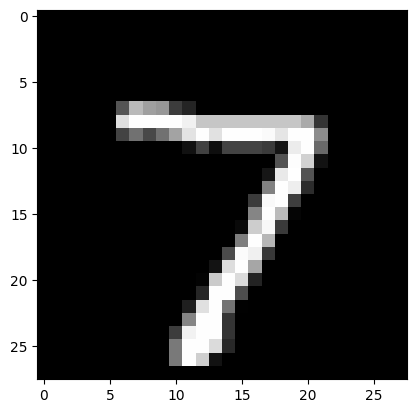

In [16]:
test_samples = enumerate(test_dataloader)
b_i, (sample_data, sample_targets) = next(test_samples)

plt.imshow(sample_data[0][0], cmap='gray', interpolation='none')
plt.show()

예측할 때 먼저 axis = 1 축에서 max 함수로 확률이 가장 높은 클래스를 먼저 계산한다. max 함수는 sample_data에서 샘플마다 클래스의 확률을 저장한 리스트와 각 샘플에 대한 클래스 레이블 리스트를 출력한다. 따라서 인덱스 [1]을 사용해 두 번째 리스트를 선택할 수 있다.  
또한 sample_data에서 첫 번째 샘플만 보려면 인덱스 [0]을 사용해 첫 번째 클래스 레이블을 선택한다.

In [17]:
print(f"Model prediction is : {model(sample_data).data.max(1)[1][0]}")
print(f"Ground truth is : {sample_targets[0]}")

Model prediction is : 7
Ground truth is : 7
